# LAB | Hyperparameter Tuning

**Load the data**

Finally step in order to maximize the performance on your Spaceship Titanic model.

The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

So far we've been training and evaluating models with default values for hyperparameters.

Today we will perform the same feature engineering as before, and then compare the best working models you got so far, but now fine tuning it's hyperparameters.

In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
spaceship_df = spaceship.copy()

Now perform the same as before:
- Feature Scaling
- Feature Selection


In [6]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Selecting numerical features

numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Filling missing values with the mean

spaceship_df[numerical_features] = spaceship_df[numerical_features].fillna(spaceship_df[numerical_features].mean())

# Initializing the StandardScaler

scaler = StandardScaler()

# Scaling numerical features

spaceship_df[numerical_features] = scaler.fit_transform(spaceship_df[numerical_features])

# Display the scaled numerical features

spaceship_df[numerical_features].head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.709437,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023
1,-0.336717,-0.175364,-0.281669,-0.248968,0.211505,-0.230194
2,2.034566,-0.275409,1.955616,-0.290817,5.694289,-0.225782
3,0.290975,-0.340590,0.517406,0.330225,2.683471,-0.098708
4,-0.894666,0.118709,-0.243409,-0.038048,0.225732,-0.267258


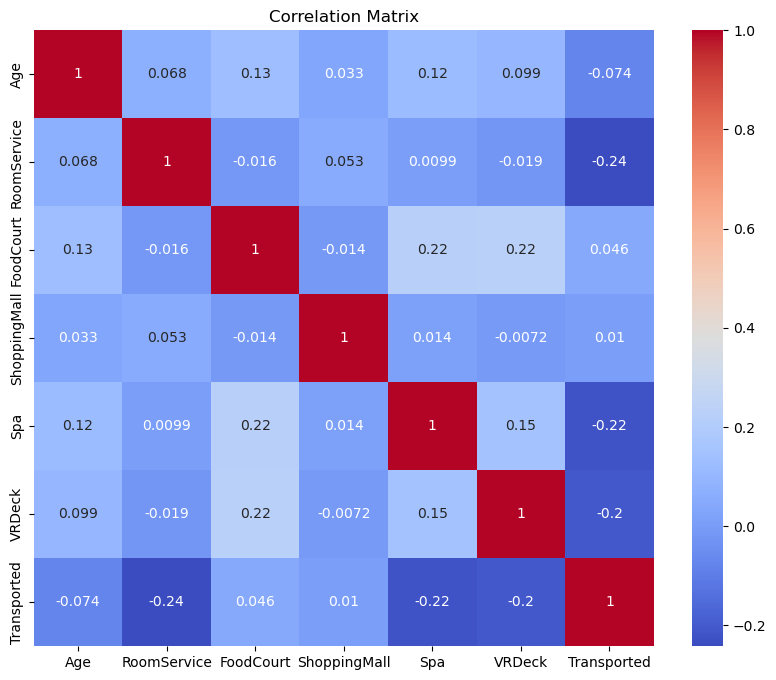

Transported     1.000000
FoodCourt       0.046074
ShoppingMall    0.010019
Age            -0.074249
VRDeck         -0.204825
Spa            -0.218791
RoomService    -0.242048
Name: Transported, dtype: float64

In [7]:
#your code here

import seaborn as sns
import matplotlib.pyplot as plt

# Adding the target variable to the numerical features for correlation analysis

correlation_df = spaceship_df[numerical_features + ['Transported']]

# Calculating the correlation matrix

correlation_matrix = correlation_df.corr()

# Plotting the correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Display correlation of features with the target variable 'Transported'

correlation_with_target = correlation_matrix['Transported'].sort_values(ascending=False)
correlation_with_target

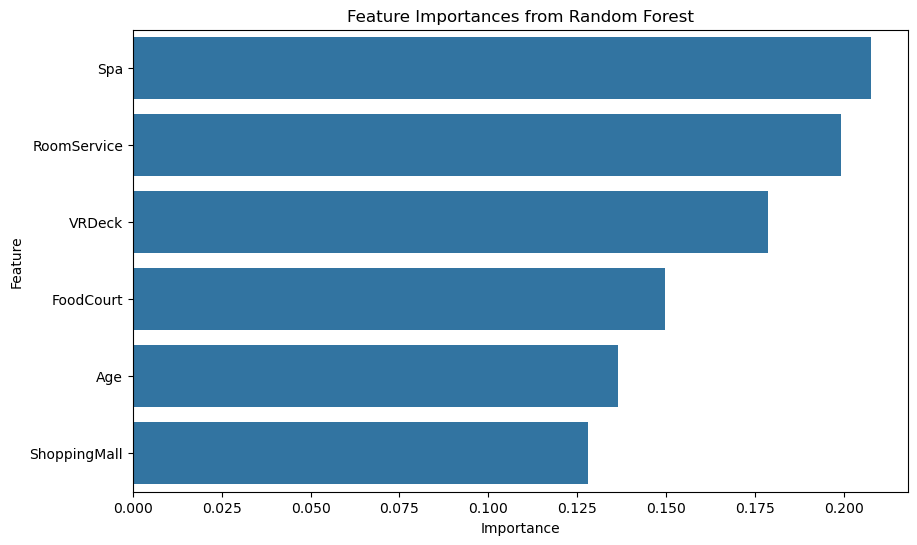

,Feature,Importance
4,Spa,0.207704
1,RoomService,0.199293
5,VRDeck,0.178586
2,FoodCourt,0.149834
0,Age,0.136439
3,ShoppingMall,0.128143


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Converting the target variable to numerical

spaceship_df['Transported'] = spaceship_df['Transported'].astype(int)

# Preparing the feature matrix X and the target vector y

X = spaceship_df[numerical_features]
y = spaceship_df['Transported']

# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Random Forest classifier

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Extracting feature importances

feature_importances = rf_classifier.feature_importances_

# Creating a DataFrame for feature importances

importance_df = pd.DataFrame({
    'Feature': numerical_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

import matplotlib.pyplot as plt

# Plotting feature importances

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Random Forest')
plt.show()

importance_df

- Now let's use the best model we got so far in order to see how it can improve when we fine tune it's hyperparameters.

In [9]:
#your code here

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Initializing the Random Forest classifier with default hyperparameters

rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model

rf_classifier.fit(X_train, y_train)

# Make predictions

y_pred = rf_classifier.predict(X_test)

# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with default hyperparameters: {accuracy}")

# Manually adjust hyperparameters and re-evaluate

rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with adjusted hyperparameters: {accuracy}")

Accuracy with default hyperparameters: 0.7699827487061529
Accuracy with adjusted hyperparameters: 0.7711328349626222


- Evaluate your model

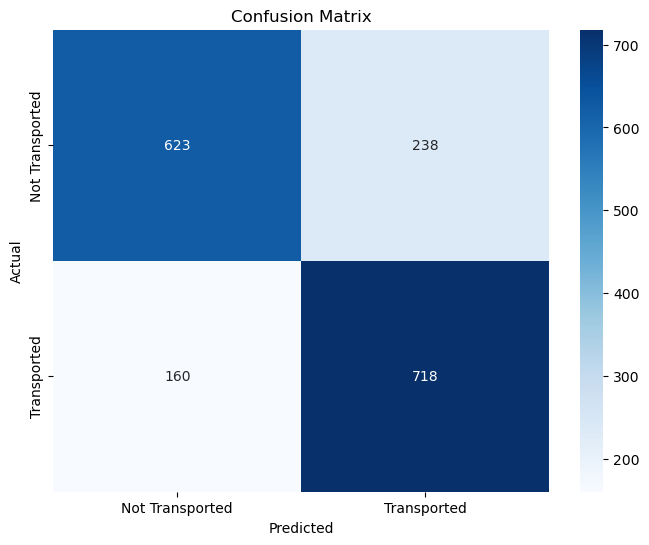

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       861
           1       0.75      0.82      0.78       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739



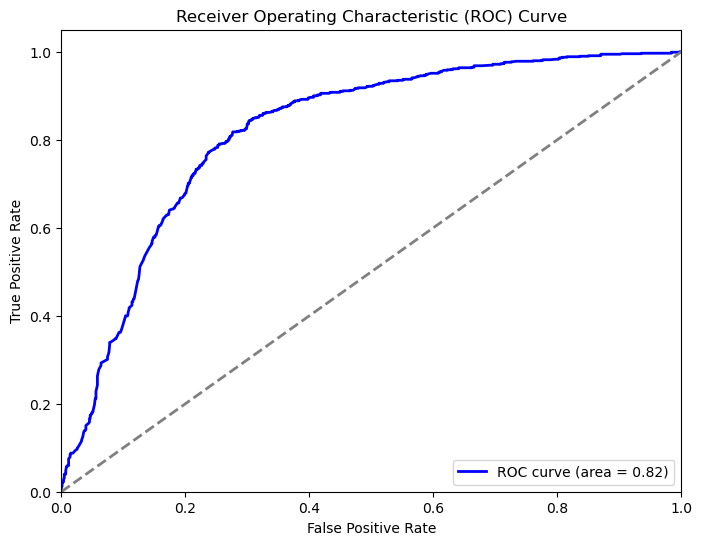

np.float64(0.8182498234028873)

In [11]:
#your code here

# Re-import necessary libraries and reload the dataset

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


# Feature Scaling

numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
spaceship_df[numerical_features] = spaceship_df[numerical_features].fillna(spaceship_df[numerical_features].mean())
scaler = StandardScaler()
spaceship_df[numerical_features] = scaler.fit_transform(spaceship_df[numerical_features])

# Converting the target variable to numerical

spaceship_df['Transported'] = spaceship_df['Transported'].astype(int)

# Preparing the feature matrix X and the target vector y

X = spaceship_df[numerical_features]
y = spaceship_df['Transported']

# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Re-initialize the Random Forest classifier with adjusted hyperparameters

rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)

# Fit the model

rf_classifier.fit(X_train, y_train)

# Make predictions

y_pred = rf_classifier.predict(X_test)

# Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report

class_report = classification_report(y_test, y_pred)

# Plotting the confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Transported', 'Transported'], yticklabels=['Not Transported', 'Transported'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Displaying the classification report

print("Classification Report:")
print(class_report)

# ROC Curve and AUC

y_prob = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

roc_auc

**Grid/Random Search**

For this lab we will use Grid Search.

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


# Feature Scaling
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
spaceship_df[numerical_features] = spaceship_df[numerical_features].fillna(spaceship_df[numerical_features].mean())
scaler = StandardScaler()
spaceship_df[numerical_features] = scaler.fit_transform(spaceship_df[numerical_features])

# Converting the target variable to numerical
spaceship_df['Transported'] = spaceship_df['Transported'].astype(int)

# Preparing the feature matrix X and the target vector y
X = spaceship_df[numerical_features]
y = spaceship_df['Transported']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Re-initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Defining the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initializing the GridSearchCV with the Random Forest classifier
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fitting GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Extracting the best parameters and the best score
best_params_grid = grid_search.best_params_
best_score_grid = grid_search.best_score_

print("Best parameters from GridSearchCV:", best_params_grid)
print("Best score from GridSearchCV:", best_score_grid)

# Evaluate the model with the best parameters from GridSearchCV
best_rf_classifier = grid_search.best_estimator_

# Make predictions
y_pred = best_rf_classifier.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Transported', 'Transported'], yticklabels=['Not Transported', 'Transported'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Displaying the classification report
print("Classification Report:")
print(class_report)

# ROC Curve and AUC
y_prob = best_rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC:", roc_auc)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n